### Logistic regression: line plot

In [1]:
# Libraries
import sys, os
import mne # Python package for processing and analyzing electrophysiological data
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Data loading

In [14]:
# load data
# ~~~~~~~~~~~~~~ Parameters
group = 'adult' # 'adult' or 'baby'
modality = 'visual' # 'visual' or 'audio'
subject_number = 5 # specify the subject number

# Print out each parameter
print(f"{group} subject {subject_number}: {modality} data will be visualized")
# ~~~~~~~~~~~~~~ Parameters ~~~~~~~~~~~~~~


# ~~~~~~~~~~~~~~ Set the working directory
path = f"/u/kazma/MINT/data/{group}/processed/{modality}"
sub_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
sub_folders_sorted = sorted(sub_folders, key=lambda x: int(re.search(r'\d+', x).group())) # Sort the folders based on the numeric part after "sub-"
# ~~~~~~~~~~~~~~ Set the working directory ~~~~~~~~~~~~~~



### SUB_LOOP
subject = sub_folders_sorted[subject_number-1]



# each subject's file name
sub_filename = os.path.join(path, subject, 'accuracy_pairwise.pkl')

# Open the file and load data
with open(sub_filename, 'rb') as file:
    data = pickle.load(file)
data = pd.DataFrame(data)

# Define column names as shown in the image
column_names = [
    "1 vs. 2",
    "1 vs. 3",
    "1 vs. 4",
    "1 vs. 5",
    "1 vs. 6",
    "2 vs. 3",
    "2 vs. 4",
    "2 vs. 5",
    "2 vs. 6",
    "3 vs. 4",
    "3 vs. 5",
    "3 vs. 6",
    "4 vs. 5",
    "4 vs. 6",
    "5 vs. 6"
]

# Convert column name
data.columns=column_names

average = data.mean(axis=1)


adult subject 5: visual data will be visualized


### Ploat all pairs

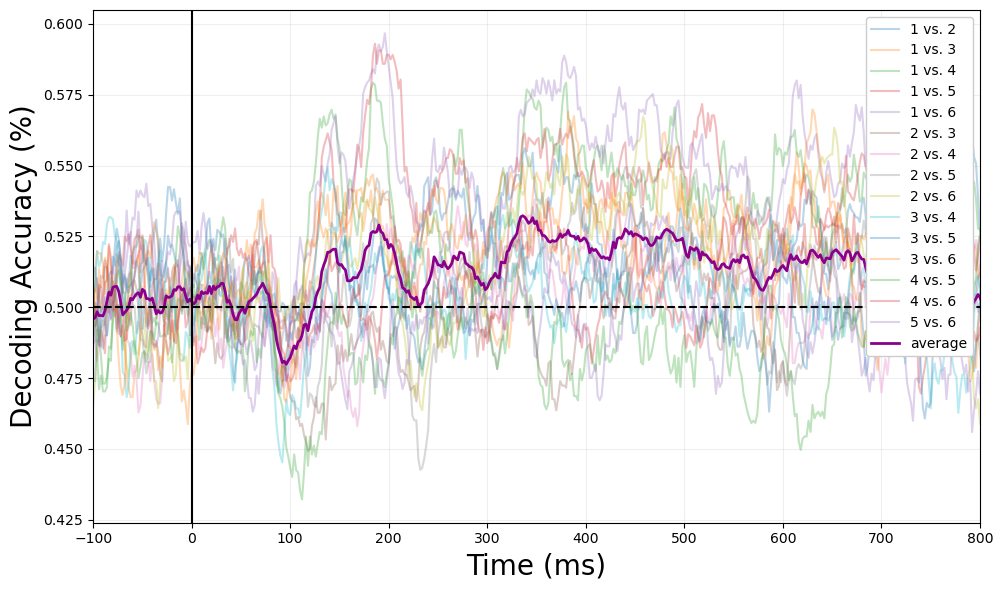

In [15]:
# Plot each column
x = np.linspace(-100,1000,551)

plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(x, data[column], label=column, alpha=0.3)

plt.plot(x, average, label='average', alpha=1, color='darkmagenta', linewidth=2)

# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Decoding Accuracy (%)', size=20)
plt.legend(loc='upper right', fontsize=10, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0.5,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-100,800)

# save the image
plt.savefig(f"{path}/{subject}/timeresolved_decoding.png", dpi=300, bbox_inches='tight')

plt.show()

### Plot only 1 vs pairs

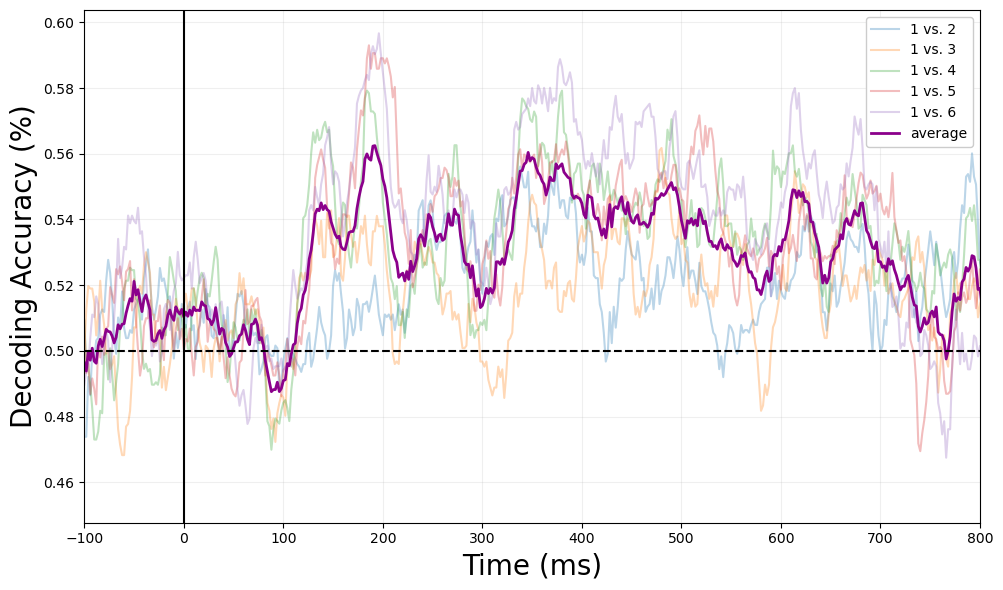

In [16]:
# Plot each column
x = np.linspace(-100,1000,551)

average = data.iloc[:,:5].mean(axis=1)

plt.figure(figsize=(10, 6))
alpha=0.3
plt.plot(x, data['1 vs. 2'], label='1 vs. 2', alpha=alpha)
plt.plot(x, data['1 vs. 3'], label='1 vs. 3', alpha=alpha)
plt.plot(x, data['1 vs. 4'], label='1 vs. 4', alpha=alpha)
plt.plot(x, data['1 vs. 5'], label='1 vs. 5', alpha=alpha)
plt.plot(x, data['1 vs. 6'], label='1 vs. 6', alpha=alpha)

plt.plot(x, average, label='average', alpha=1, color='darkmagenta', linewidth=2)

# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Decoding Accuracy (%)', size=20)
plt.legend(loc='upper right', fontsize=10, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0.5,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-100,800)

# save the image
plt.savefig(f"{path}/{subject}/timeresolved_decoding_1vs.png", dpi=300, bbox_inches='tight')

plt.show()

### Plot subitizing range

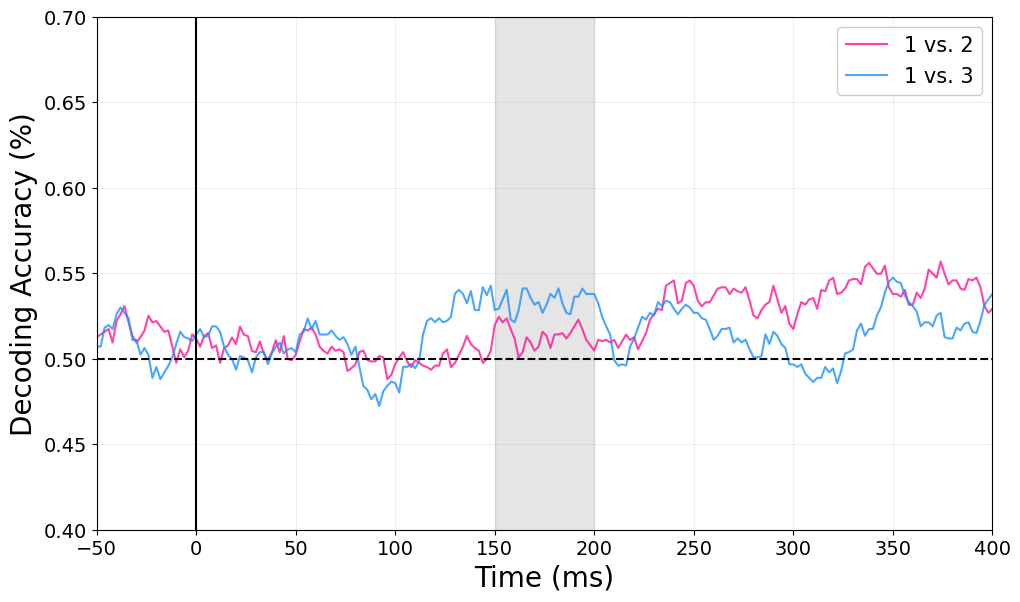

In [ ]:
# Plot each column
x = np.linspace(-100,1000,551)



plt.figure(figsize=(10, 6))

# Add a gray shaded area between 150ms and 250ms
if group == 'adult':
    plt.axvspan(150, 250, color='gray', alpha=0.2)
else:
    plt.axvspan(250, 350, color='gray', alpha=0.2)


alpha=0.8
plt.plot(x, data['1 vs. 2'], label='1 vs. 2', alpha=alpha, color = 'deeppink')
plt.plot(x, data['1 vs. 3'], label='1 vs. 3', alpha=alpha, color = 'dodgerblue')


# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Decoding Accuracy (%)', size=20)
plt.legend(loc='upper right', fontsize=15, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0.5,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-50,400)
plt.ylim(0.4, 0.7)
# Increase font size for axis scales
plt.tick_params(axis='both', which='major', labelsize=14)  # Adjust 'labelsize' as needed


# save the image
plt.savefig(f"{path}/{subject}/timeresolved_decoding_subitizing.png", dpi=300, bbox_inches='tight')

plt.show()

### Plot number estimation range

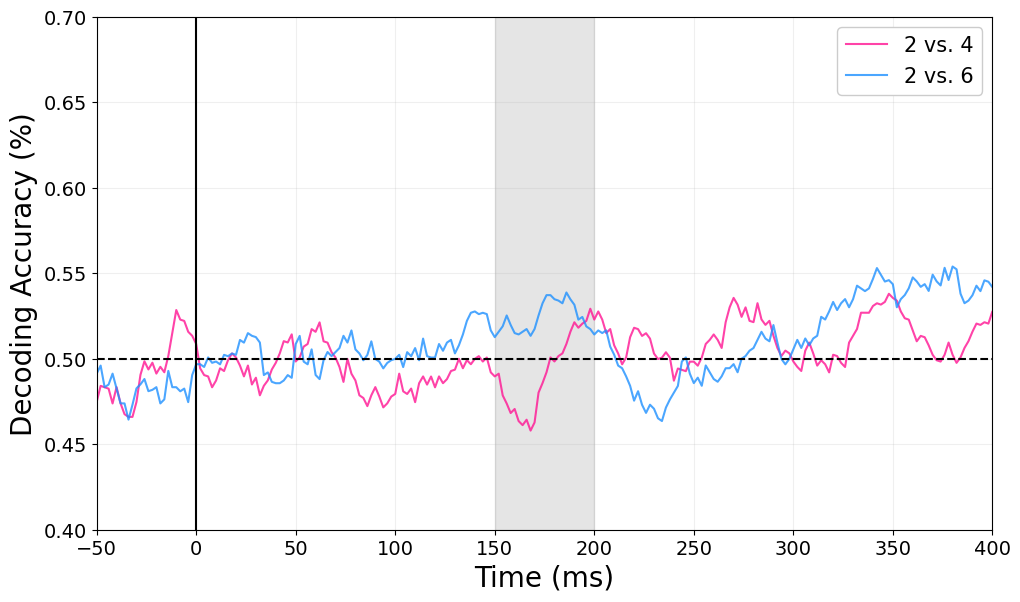

In [ ]:
# Plot each column
x = np.linspace(-100,1000,551)


plt.figure(figsize=(10, 6))

# Add a gray shaded area between 150ms and 250ms
if group == 'adult':
    plt.axvspan(150, 250, color='gray', alpha=0.2)
else:
    plt.axvspan(250, 350, color='gray', alpha=0.2)

alpha=0.8
plt.plot(x, data['2 vs. 4'], label='2 vs. 4', alpha=alpha, color = 'deeppink')
plt.plot(x, data['2 vs. 6'], label='2 vs. 6', alpha=alpha, color = 'dodgerblue')


# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Decoding Accuracy (%)', size=20)
plt.legend(loc='upper right', fontsize=15, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0.5,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-50,400)
plt.ylim(0.4, 0.7)
# Increase font size for axis scales
plt.tick_params(axis='both', which='major', labelsize=14)  # Adjust 'labelsize' as needed


# save the image
plt.savefig(f"{path}/{subject}/timeresolved_decoding_estimation.png", dpi=300, bbox_inches='tight')

plt.show()

### 3D peak accuracy representations

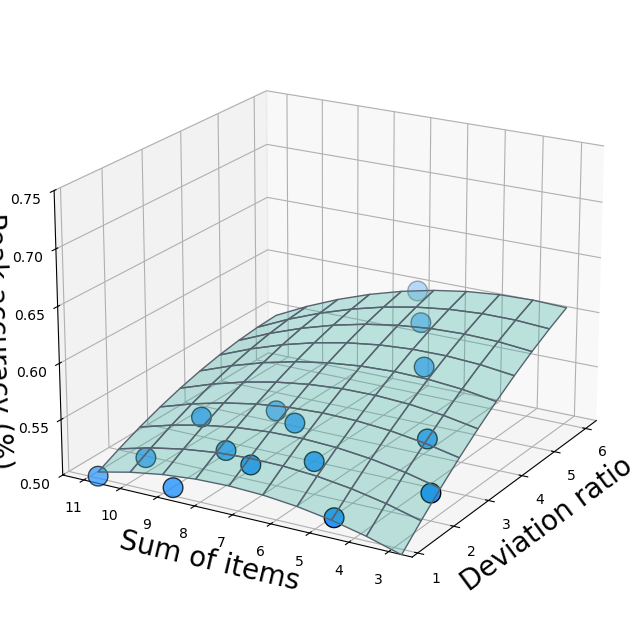

In [ ]:

numerosity_pairs = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
total_paired_numerosity = np.array([sum(pair) for pair in numerosity_pairs])  # y-axis
deviation_ratios = np.array([pair[1] / pair[0] for pair in numerosity_pairs])  # x-axis

# Extract rows 125 to 150, corresponding to 150-200ms, rows 175 to 200, corresponding to 250-300ms
if group == 'adult':
    subset = data.iloc[125:175]
else:
    subset = data.iloc[175:225]

# Compute the maximum for each column
max_values = subset.max()

decoding_accuracy = np.array(max_values)  # z-axis (example values)


# Combine x and y data for nonlinear regression
X = np.column_stack((deviation_ratios, total_paired_numerosity))
y = decoding_accuracy

# Add polynomial features (e.g., quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for nonlinear trend
X_poly = poly.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Create a grid for plotting the nonlinear surface
x_range = np.linspace(deviation_ratios.min(), deviation_ratios.max(), 10)
y_range = np.linspace(total_paired_numerosity.min(), total_paired_numerosity.max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.column_stack([x_grid.ravel(), y_grid.ravel()])
grid_poly = poly.transform(grid_points)
z_grid = model.predict(grid_poly).reshape(x_grid.shape)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the nonlinear trend surface
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.3, color='turquoise', edgecolors='slategray')

# Scatter plot
sc = ax.scatter(deviation_ratios, total_paired_numerosity, decoding_accuracy, 
                color='dodgerblue', edgecolors='black', s=200, label='Data Points')


# Axis labels
ax.set_xlabel('Deviation ratio', size=20)
ax.set_ylabel('Sum of items', size=20)
ax.set_zlabel('Peak accuracy (%)', size=20)
ax.set_zlim(0.5, 0.75)

# Change the viewing angle
ax.view_init(elev=20, azim=210)  # Set elevation and azimuth (e.g., elev=30, azim=120)

# save the image
plt.savefig(f"{path}/{subject}/timeresolved_decoding_3D.png", dpi=300)

plt.show()


# Group level ===================================

## Average across subjects

In [4]:
 # load data
# ~~~~~~~~~~~~~~ Parameters
group = 'adult'
modality = 'visual' # 'visual' or 'audio'

# Print out each parameter
print(f"{group} subject: {modality} data will be visualized")
# ~~~~~~~~~~~~~~ Parameters ~~~~~~~~~~~~~~


# ~~~~~~~~~~~~~~ Set the working directory
path = f"/u/kazma/MINT/data/{group}/processed/{modality}"
sub_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
sub_folders_sorted = sorted(sub_folders, key=lambda x: int(re.search(r'\d+', x).group())) # Sort the folders based on the numeric part after "sub-"
# ~~~~~~~~~~~~~~ Set the working directory ~~~~~~~~~~~~~~

# remove uninterested subjects
# Names to remove
names_to_remove = ["sub-01", "sub-02"]
# Filter out the names to remove
sub_folders_sorted = [name for name in sub_folders_sorted if name not in names_to_remove]

# initialize empty list
subject_dfs = []

### ~~~~~~~~~~~~~~ SUB_LOOP
for subject in sub_folders_sorted:

    # each subject's file name
    sub_filename = os.path.join(path, subject, 'accuracy_pairwise.pkl')

    # Open the file and load data
    with open(sub_filename, 'rb') as file:
        data = pickle.load(file)
    data = pd.DataFrame(data)

    # Define column names as shown in the image
    column_names = [
        "1 vs. 2",
        "1 vs. 3",
        "1 vs. 4",
        "1 vs. 5",
        "1 vs. 6",
        "2 vs. 3",
        "2 vs. 4",
        "2 vs. 5",
        "2 vs. 6",
        "3 vs. 4",
        "3 vs. 5",
        "3 vs. 6",
        "4 vs. 5",
        "4 vs. 6",
        "5 vs. 6"
    ]

    # Convert column name
    data.columns=column_names

    # add single subject's pd.dataframe
    subject_dfs.append(data)

### ~~~~~~~~~~~~~~ SUB_LOOP END ~~~~~~~~~~~~~~



### ~~~~~~~~~~~~~~ Average computation

# Initialize an accumulator DataFrame with zeros
average_df = pd.DataFrame(0, index=subject_dfs[0].index, columns=subject_dfs[0].columns)

# Loop through each subject DataFrame and accumulate the sum
for subject_df in subject_dfs:
    average_df += subject_df

# Divide by the number of subjects to get the average
average_df /= len(subject_dfs)

### ~~~~~~~~~~~~~~ Average computation ~~~~~~~~~~~~~~


### ~~~~~~~~~~~~~~ Standard Deviation Computation

# Initialize an accumulator DataFrame for the sum of squared differences from the mean
variance_df = pd.DataFrame(0, index=subject_dfs[0].index, columns=subject_dfs[0].columns)

# Loop through each subject DataFrame to accumulate the squared differences
for subject_df in subject_dfs:
    variance_df += (subject_df - average_df) ** 2

# Divide by the number of subjects to get the variance
variance_df /= len(subject_dfs)

# Take the square root to get the standard deviation
std_dev_df = np.sqrt(variance_df)

### ~~~~~~~~~~~~~~ Standard Deviation Computation END ~~~~~~~~~~~~~~

adult subject: visual data will be visualized


### plot subitizing

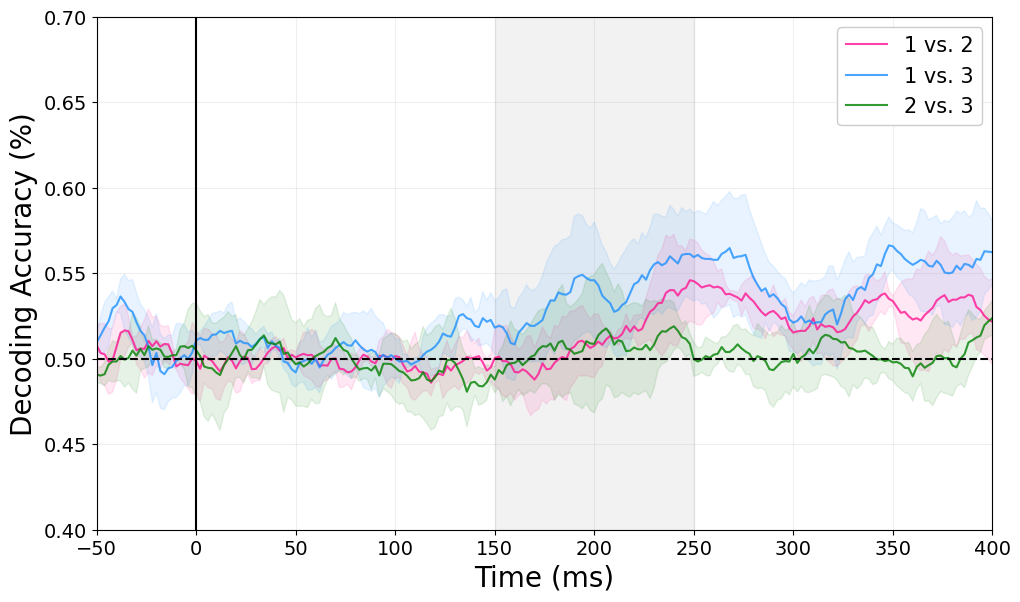

In [ ]:

### ~~~~~~~~~~~~~~ Plot subitizing
# Plot each column
x = np.linspace(-100,1000,551)

# Plot each column
plt.figure(figsize=(10, 6))

# Add a gray shaded area between 150ms and 250ms
if group == 'adult':
    plt.axvspan(150, 250, color='gray', alpha=0.1)
else:
    plt.axvspan(250, 300, color='gray', alpha=0.1)

alpha=0.8

# Define columns to plot
columns_to_plot = ['1 vs. 2', '1 vs. 3', '2 vs. 3']
colors = ['deeppink', 'dodgerblue', 'green']

for col, color in zip(columns_to_plot, colors):
    # Plot mean curve
    plt.plot(x, average_df[col], label=col, alpha=alpha, color=color)

    # Plot shaded standard deviation
    plt.fill_between(
        x, 
        average_df[col] - std_dev_df[col],  # Mean - Std Dev
        average_df[col] + std_dev_df[col],  # Mean + Std Dev
        color=color, 
        alpha=0.1
    )

# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Decoding Accuracy (%)', size=20)
plt.legend(loc='upper right', fontsize=15, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0.5,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-50,400)
plt.ylim(0.4, 0.7)
# Increase font size for axis scales
plt.tick_params(axis='both', which='major', labelsize=14)  # Adjust 'labelsize' as needed


# save the image
plt.savefig(f"{path}/avg_timeresolved_decoding_subitizing.png", dpi=300, bbox_inches='tight')

plt.show()
### ~~~~~~~~~~~~~~ Plot subitizing ~~~~~~~~~~~~~~




### plot number estimation

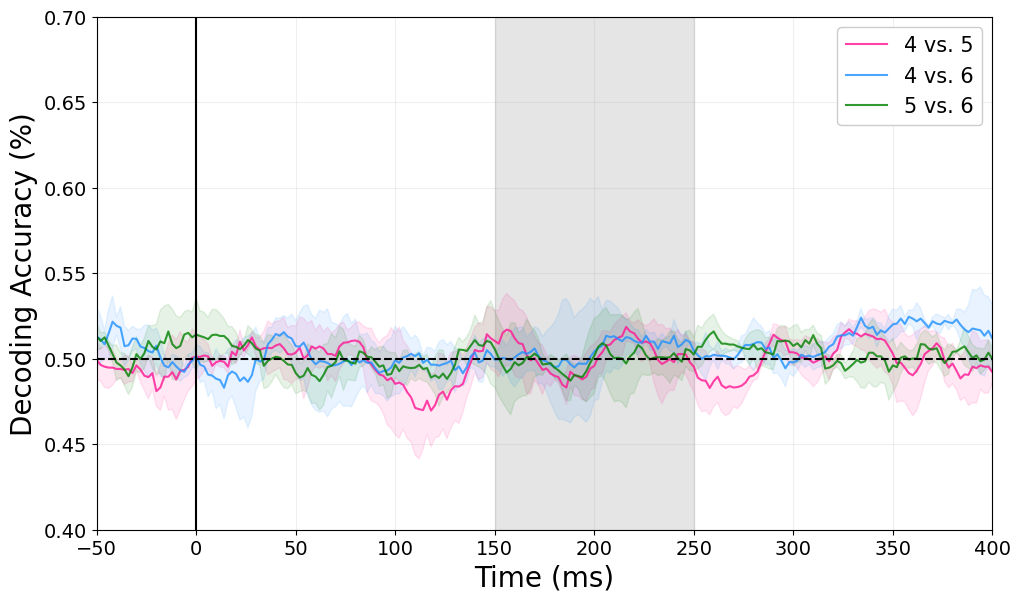

In [10]:

### ~~~~~~~~~~~~~~ Plot Number estimation
# Plot each column
x = np.linspace(-100,1000,551)

plt.figure(figsize=(10, 6))

# Add a gray shaded area between 150ms and 250ms
if group == 'adult':
    plt.axvspan(150, 250, color='gray', alpha=0.2)
else:
    plt.axvspan(250, 350, color='gray', alpha=0.2)

alpha=0.8
# Define columns to plot
columns_to_plot = ['4 vs. 5', '4 vs. 6', '5 vs. 6']
colors = ['deeppink', 'dodgerblue', 'green']

for col, color in zip(columns_to_plot, colors):
    # Plot mean curve
    plt.plot(x, average_df[col], label=col, alpha=alpha, color=color)

    # Plot shaded standard deviation
    plt.fill_between(
        x, 
        average_df[col] - std_dev_df[col],  # Mean - Std Dev
        average_df[col] + std_dev_df[col],  # Mean + Std Dev
        color=color, 
        alpha=0.1
    )


# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Decoding Accuracy (%)', size=20)
plt.legend(loc='upper right', fontsize=15, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0.5,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-50,400)
plt.ylim(0.4, 0.7)
# Increase font size for axis scales
plt.tick_params(axis='both', which='major', labelsize=14)  # Adjust 'labelsize' as needed


# save the image
plt.savefig(f"{path}/avg_timeresolved_decoding_beyondsubitizing.png", dpi=300, bbox_inches='tight')

plt.show()


### plot 3D dimensions peak accuracy

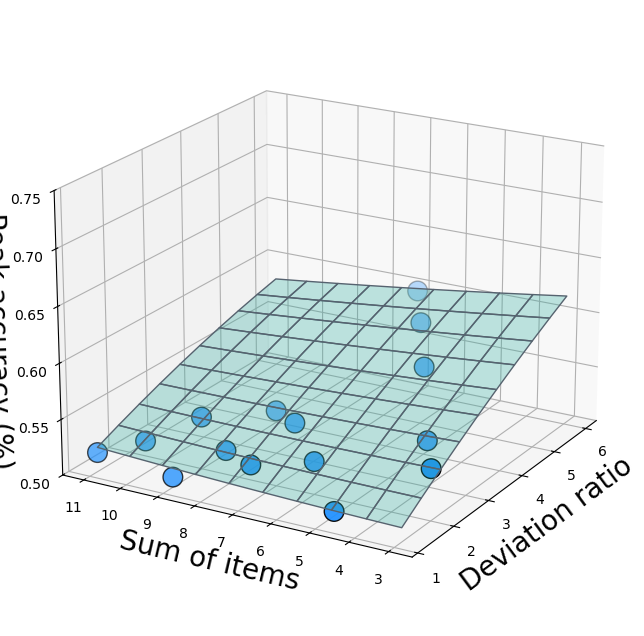

In [27]:

numerosity_pairs = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
total_paired_numerosity = np.array([sum(pair) for pair in numerosity_pairs])  # y-axis
deviation_ratios = np.array([pair[1] / pair[0] for pair in numerosity_pairs])  # x-axis

# Extract rows 125 to 150, corresponding to 150-200ms
if group == 'adult':
    subset = data.iloc[125:175]
else:
    subset = data.iloc[175:225]
    
# Compute the maximum for each column
max_values = subset.max()

decoding_accuracy = np.array(max_values)  # z-axis (example values)


# Combine x and y data for nonlinear regression
X = np.column_stack((deviation_ratios, total_paired_numerosity))
y = decoding_accuracy

# Add polynomial features (e.g., quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for nonlinear trend
X_poly = poly.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Create a grid for plotting the nonlinear surface
x_range = np.linspace(deviation_ratios.min(), deviation_ratios.max(), 10)
y_range = np.linspace(total_paired_numerosity.min(), total_paired_numerosity.max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.column_stack([x_grid.ravel(), y_grid.ravel()])
grid_poly = poly.transform(grid_points)
z_grid = model.predict(grid_poly).reshape(x_grid.shape)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the nonlinear trend surface
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.3, color='turquoise', edgecolors='slategray')

# Scatter plot
sc = ax.scatter(deviation_ratios, total_paired_numerosity, decoding_accuracy, 
                color='dodgerblue', edgecolors='black', s=200, label='Data Points')


# Axis labels
ax.set_xlabel('Deviation ratio', size=20)
ax.set_ylabel('Sum of items', size=20)
ax.set_zlabel('Peak accuracy (%)', size=20)
ax.set_zlim(0.5, 0.75)
# Change the viewing angle
ax.view_init(elev=20, azim=210)  # Set elevation and azimuth (e.g., elev=30, azim=120)

# save the image
plt.savefig(f"{path}/avg_timeresolved_decoding_3D.png", dpi=300)

plt.show()
